# Proyecto Final -- Telecomunicaciones

## Descripción del proyecto

Telecomunicaciones: identificar operadores ineficaces

En los servicios de telecomunicaciones, la calidad de las interacciones entre los operadores y los clientes es fundamental para garantizar una experiencia satisfactoria. 
No todos los operadores trabajan con el mismo nivel de eficiencia; Factores como una alta cantidad de llamadas perdidas, tiempos de espera prolongadoS, pueden  ser indicadores de ineficiencia.

El servicio de telefonía virtual CallMeMaybe busca implementar una nueva función que brindará información clave  a los supervisores sobre los operadores menos eficaces.

El objetivo es optimizar la eficiencia operativa y mejorar la experiencia del cliente mediante la detección temprana de ineficiencias y su resolución.

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. El análisis de estos datos permitirá a los supervisores tomar decisiones informadas, optimizar el rendimiento del equipo y mejorar la calidad del servicio ofrecido.

### Objetivos Principales del Proyecto

**Lleva a cabo el análisis exploratorio de datos:** Comprender la estructura del dataset(tipos de llamadas entrantes, salientes, internas, tiempos de espera, llamadas perdidas, identificar posibles anomalías en los datos.

**Identificar operadores ineficaces** Definir los criterios para poder clasificar a un operador como ineficaz.

**Pruebas de hipótesis Estadística:** Verificar si los operadores ineficaces tienen un impacto significativo en el desempeño general del servicio.

## Lectura de datos

In [ ]:
# Importamos las librerias necesarias 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso,LogisticRegression, Ridge 
from sklearn.metrics import classification_report, silhouette_score,roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#leer el archivo
telecom_data = pd.read_csv('telecom_dataset_us.csv')
telecom_clients = pd.read_csv('telecom_clients_us.csv')

In [ ]:
# Mostrar las primeras filas del DataFrame para verificar los datos
print(telecom_data.head())

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  


In [ ]:
# Mostrar las primeras filas del DataFrame para verificar los datos
print(telecom_clients.head())

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16


In [ ]:
# Verificar información general del DataFrame 
print(telecom_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None


In [ ]:
# Verificar información general del DataFrame 
print(telecom_clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None


In [ ]:
telecom_data.sample(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
44800,168062,2019-11-11 00:00:00+03:00,out,False,947648.0,True,130,0,2341
6164,166541,2019-09-18 00:00:00+03:00,in,False,908958.0,False,21,2667,3284
52079,168361,2019-10-29 00:00:00+03:00,out,False,945286.0,False,112,6682,9123
19711,166985,2019-11-17 00:00:00+03:00,in,False,904284.0,False,1,84,103
6540,166548,2019-08-18 00:00:00+03:00,in,False,NaN,True,1,0,15
39324,167727,2019-10-19 00:00:00+03:00,out,False,926486.0,True,2,0,60
34729,167497,2019-11-27 00:00:00+03:00,out,False,932836.0,True,2,0,54
39570,167747,2019-11-08 00:00:00+03:00,out,False,922428.0,False,1,75,78
6730,166582,2019-08-31 00:00:00+03:00,out,False,885876.0,True,213,0,6807
47610,168187,2019-10-25 00:00:00+03:00,in,False,937966.0,False,14,1617,1729


In [ ]:
telecom_clients.sample(10)

,user_id,tariff_plan,date_start
185,168275,C,2019-10-18
267,167650,C,2019-09-24
722,166797,B,2019-08-20
684,167164,B,2019-09-04
561,168105,B,2019-10-14
227,167700,C,2019-09-26
228,167852,C,2019-10-02
148,168303,C,2019-10-21
415,167042,C,2019-08-29
140,168522,C,2019-10-29


Importamos las librerias necesarias para el desarrollo del proyecto. De igual manera importamos los Datasets con los datos e información general mediante el método info() para visualizar la estructura y análisis general del dataset.Se utiliza el método Sample()para complementar el análisis exploratorio de nuestros datos.

##  Preparar los datos para el análisis

Asignamos a un nuevo DataFrame, sin valores ausentes para no modificar el DataFrame inicial. 

In [ ]:
telecom_data = telecom_data.dropna()
telecom_data['operator_id'] = telecom_data['operator_id'].astype(int)
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              45670 non-null  int64 
 1   date                 45670 non-null  object
 2   direction            45670 non-null  object
 3   internal             45670 non-null  object
 4   operator_id          45670 non-null  int64 
 5   is_missed_call       45670 non-null  bool  
 6   calls_count          45670 non-null  int64 
 7   call_duration        45670 non-null  int64 
 8   total_call_duration  45670 non-null  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 3.2+ MB


Se eliminaron los valores ausentes que existian en la columna 'operador_id'.  Y se cambio el tipo de dato ya que  los valores decimales no aportan información significativa o no son relevantes para el análisis.

In [ ]:
telecom_data.sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
37716,167634,2019-10-10 00:00:00+03:00,in,False,918436,False,1,109,119
8477,166658,2019-09-16 00:00:00+03:00,in,False,890402,False,5,733,837
26029,167150,2019-10-04 00:00:00+03:00,out,True,905566,False,6,119,154
34899,167521,2019-10-17 00:00:00+03:00,in,False,919790,False,5,329,551
16293,166916,2019-10-07 00:00:00+03:00,in,False,906404,False,16,3765,4140


In [ ]:
telecom_data = telecom_data.drop_duplicates()
telecom_data

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29
...,...,...,...,...,...,...,...,...,...
53895,168606,2019-11-09 00:00:00+03:00,out,False,957922,False,4,551,593
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922,False,1,0,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922,False,2,479,501


Para garantizar la calidad de los datos y evitar afectación en la integridad de los datos;  y confiabilidad  del análisis, se eliminarón los datos duplicados. 
Para evitar cálculos erróneos (media, suma, o conteos) una vez eliminados aseguramos que los datos sean precisos, eficientes y útiles para el análisis. 

## Identificar operadores ineficaces

Determinar qué operadores tienen un desempeño deficiente.
 
Determinar las métricas que se usarán para identificar ineficiencia:

Llamadas perdidas: Porcentaje de llamadas perdidas (internas y externas).

Tiempo de espera: Tiempo promedio de espera para llamadas entrantes.

Volumen de llamadas salientes: Número de llamadas salientes realizadas en comparación con el objetivo esperado.

In [ ]:
telecom_data.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000
mean,167301.113543,916516.771155,16.921381,1010.940011,1323.153238
std,600.513986,21234.081589,59.786187,4066.666485,4788.953155
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900790.000000,1.000000,0.000000,67.000000
50%,167175.000000,913938.000000,4.000000,106.000000,289.000000
75%,167827.000000,937708.000000,14.000000,772.000000,1107.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


In [ ]:
df_call_duration = telecom_data[telecom_data['is_missed_call'] == True]

df_call_duration = df_call_duration.groupby('direction')['call_duration'].mean()
df_call_duration

direction
in     33.559942
out     0.053706
Name: call_duration, dtype: float64

** DESCRIPCION 

El promedio de llamadas perdidas de entrada es de 33% comparado con el prmedio de llamadas de salida. 

Entonces podemos deducir que la mayoria de llamdas perdidas son llamandas de entrada. 

In [ ]:
telecom_data['wait_time'] = telecom_data['total_call_duration'] - telecom_data['call_duration'] 

telecom_data

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29,26
...,...,...,...,...,...,...,...,...,...,...
53895,168606,2019-11-09 00:00:00+03:00,out,False,957922,False,4,551,593,42
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922,False,1,0,25,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922,True,1,0,38,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922,False,2,479,501,22


In [ ]:
telecom_data = telecom_data.dropna()
telecom_data

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29,26
...,...,...,...,...,...,...,...,...,...,...
53895,168606,2019-11-09 00:00:00+03:00,out,False,957922,False,4,551,593,42
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922,False,1,0,25,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922,True,1,0,38,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922,False,2,479,501,22


In [ ]:
telecom_data.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration,wait_time
count,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000
mean,167301.113543,916516.771155,16.921381,1010.940011,1323.153238,312.213227
std,600.513986,21234.081589,59.786187,4066.666485,4788.953155,1176.102940
min,166377.000000,879896.000000,1.000000,0.000000,0.000000,0.000000
25%,166782.000000,900790.000000,1.000000,0.000000,67.000000,19.000000
50%,167175.000000,913938.000000,4.000000,106.000000,289.000000,60.000000
75%,167827.000000,937708.000000,14.000000,772.000000,1107.000000,219.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000,46474.000000


** Descripción

Obtuvimos el promedio del tiempo de espera; si estamos habando de aproximandamente 4 minutos de espera el tiempo si es muy alto. Considerando que las llamadas no deben de esperar tanto tiempo.

In [ ]:
#Total de llamdas perdidas
df_total_missed_calls = telecom_data[telecom_data['is_missed_call'] == True].count()
total_missed_calls = df_total_missed_calls['is_missed_call']
total_missed_calls

14109

In [ ]:
df_missed_calls = telecom_data[telecom_data['is_missed_call'] == True]

df_missed_calls2 = df_missed_calls.groupby('operator_id')['operator_id'].count().reset_index(name='total_missed_calls')

df_missed_calls2

df_missed_calls = pd.merge(df_missed_calls, df_missed_calls2, on=['operator_id'])

df_missed_calls.sort_values(by='total_missed_calls', ascending=False)


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,total_missed_calls
1180,166511,2019-08-20 00:00:00+03:00,out,True,891410,True,1,0,0,0,119
1239,166511,2019-10-08 00:00:00+03:00,out,False,891410,True,17,0,132,132,119
1268,166511,2019-10-31 00:00:00+03:00,out,False,891410,True,4,0,48,48,119
1267,166511,2019-10-30 00:00:00+03:00,out,False,891410,True,13,0,330,330,119
1266,166511,2019-10-29 00:00:00+03:00,out,True,891410,True,3,0,0,0,119
...,...,...,...,...,...,...,...,...,...,...,...
3488,166774,2019-08-26 00:00:00+03:00,out,False,895266,True,1,0,6,6,1
12746,168187,2019-10-31 00:00:00+03:00,out,False,937772,True,1,0,18,18,1
3485,166774,2019-08-23 00:00:00+03:00,out,False,891976,True,2,0,23,23,1
3337,166711,2019-08-23 00:00:00+03:00,out,False,891970,True,9,0,145,145,1


In [ ]:
# Agrupar por operador y calcular métricas clave
operator_metrics = df_missed_calls.groupby('operator_id').agg({
    'total_call_duration': 'sum',
    'call_duration': 'sum',
    'calls_count': 'sum',
    'wait_time': 'mean',
    'total_missed_calls': 'count'
}).reset_index()

# Crear una columna para porcentaje de llamadas perdidas
operator_metrics['missed_calls_percentage'] = (
    operator_metrics['total_missed_calls'] / operator_metrics['calls_count']
) * 100

operator_metrics.sort_values(by='total_missed_calls', ascending=False)

,operator_id,total_call_duration,call_duration,calls_count,wait_time,total_missed_calls,missed_calls_percentage
63,891410,10638,1,972,89.386555,119,12.242798
24,885876,714852,5,23330,6216.060870,115,0.492928
64,891414,6027,0,893,53.336283,113,12.653975
166,901880,19109,0,740,172.153153,111,15.000000
89,893804,28565,3,1323,259.654545,110,8.314437
...,...,...,...,...,...,...,...
522,934188,8,0,1,8.000000,1,100.000000
524,934430,26,0,1,26.000000,1,100.000000
525,934476,247,0,9,247.000000,1,11.111111
533,935958,8,0,1,8.000000,1,100.000000


Total de porcentaje de llamadas perdidas por operador.

In [ ]:
operator_metrics.mean()

operator_id                925056.472603
total_call_duration          7201.728311
call_duration                  27.027397
calls_count                   310.865297
wait_time                     288.836294
total_missed_calls             16.106164
missed_calls_percentage        39.357478
dtype: float64

In [ ]:
#Filtrar operadores con métricas por debajo de los umbrales deseados.

ineffective_operators = operator_metrics[
    (operator_metrics['missed_calls_percentage'] > 40) |
    (operator_metrics['total_missed_calls'] > 16) |
    (operator_metrics['calls_count'] > 250)
]
ineffective_operators.sort_values(by='missed_calls_percentage', ascending=False)

,operator_id,total_call_duration,call_duration,calls_count,wait_time,total_missed_calls,missed_calls_percentage
532,935548,23,0,2,11.500000,2,100.000000
318,915958,97,0,4,24.250000,4,100.000000
120,896538,42,0,1,42.000000,1,100.000000
345,919164,81,1,7,11.428571,7,100.000000
676,944560,10,0,1,10.000000,1,100.000000
...,...,...,...,...,...,...,...
473,929426,126949,0,6347,4095.129032,31,0.488420
25,885890,772524,5,23807,7648.702970,101,0.424245
452,925922,238223,4,9258,7940.633333,30,0.324044
258,908640,98901,0,8164,4709.571429,21,0.257227


Para obtener el listado de operadores ineficientes, primero definiremos el umbral de porcentaje de llamadas perdidas y tambien definiremos el total de minutos de llamadas en espera. 

Los valores definidos son: 

% Llamadas perdidas = 4 
Tiempo de espera de llamadas = 216

Mediante estas metricas obtendremos los operadores que son ineficientes. 

<div class="alert alert-block alert-info">
<b></b>
<br><br>
 Se agrego una nueva coloumna con el total de llamadas perdidas, para  hacer el calculo de llamadas perdidas contra el total de llamadas  por operador. Lo cual nos brinda un valor exacto de la eficiencia del operador. 
<br><br>
Se actualizarón los umbrales para medir la eficiencia de un operador basado en las métricas y promedios de las siguientes columnas: 
'missed_calls_percentage', 'total_missed_calls', 'calls_count'
<br><br>
Se realizarón 2 gráficos de dispersión para identificar el total de llamadas y total de llamadas perdidas. 
</div>

In [ ]:
effective_operators = operator_metrics[
    (operator_metrics['missed_calls_percentage'] <= 40) &
    (operator_metrics['total_missed_calls'] <= 16) &
    (operator_metrics['calls_count'] <= 250)
]
effective_operators.sort_values(by='missed_calls_percentage', ascending=False)

,operator_id,total_call_duration,call_duration,calls_count,wait_time,total_missed_calls,missed_calls_percentage
566,937786,146,0,5,73.000000,2,40.000000
817,958472,139,0,15,23.166667,6,40.000000
118,896430,55,0,5,27.500000,2,40.000000
765,951650,111,0,5,55.500000,2,40.000000
527,935216,70,0,10,17.500000,4,40.000000
...,...,...,...,...,...,...,...
594,938072,4289,0,197,1072.250000,4,2.030457
654,941390,2440,0,151,813.333333,3,1.986755
523,934426,3085,0,110,1542.500000,2,1.818182
348,919190,1004,0,60,1004.000000,1,1.666667


## Gráficos

Text(0, 0.5, 'Total de llamadas')

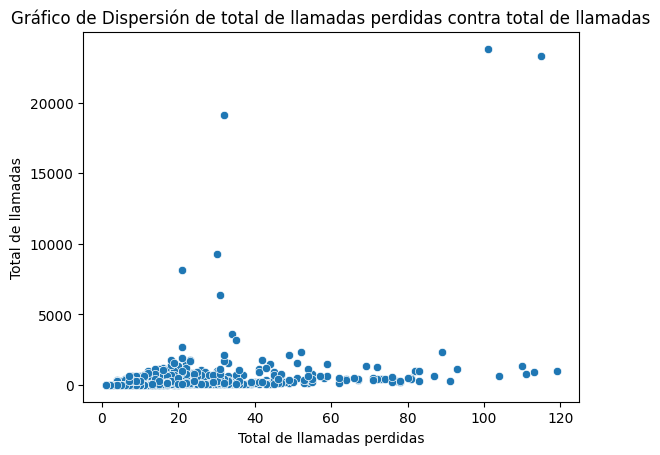

In [ ]:
#grafica 1 total de llamadas perdidas 
sns.scatterplot(y=ineffective_operators['calls_count'], x=ineffective_operators['total_missed_calls'], data=ineffective_operators)

# Configuración del gráfico
plt.title('Gráfico de Dispersión de total de llamadas perdidas contra total de llamadas')
plt.xlabel('Total de llamadas perdidas')
plt.ylabel('Total de llamadas')


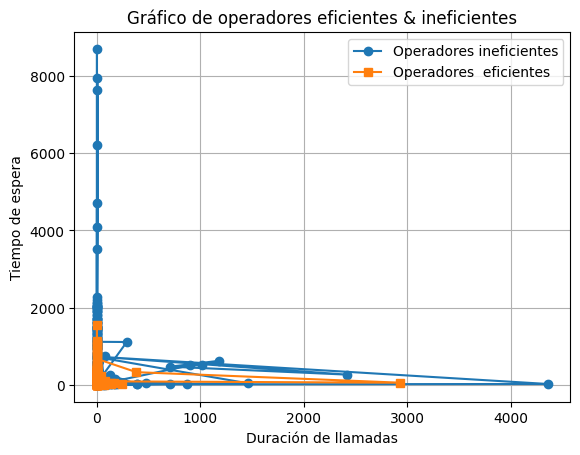

In [ ]:
#Gráfico de duracion de llamadas y tiempo de espera
plt.plot(ineffective_operators['call_duration'], 
         ineffective_operators['wait_time'], label= 'Operadores ineficientes', marker = 'o')
                                                              
plt.plot (effective_operators['call_duration'], 
          effective_operators['wait_time'], label= 'Operadores  eficientes', marker = 's')
plt.title ('Gráfico de operadores eficientes & ineficientes')
plt.xlabel ('Duración de llamadas')
plt.ylabel ('Tiempo de espera')
plt.legend ()
plt.grid ()
plt.show()

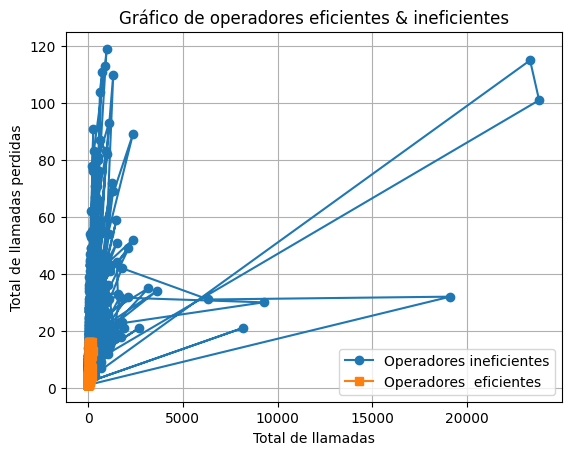

In [ ]:
# Gráfico calls_count y total_missed_calls
plt.plot(ineffective_operators['calls_count'], 
         ineffective_operators['total_missed_calls'], label= 'Operadores ineficientes', marker = 'o')
                                                              
plt.plot (effective_operators['calls_count'], 
          effective_operators['total_missed_calls'], label= 'Operadores  eficientes', marker = 's')
plt.title ('Gráfico de operadores eficientes & ineficientes')
plt.xlabel ('Total de llamadas')
plt.ylabel ('Total de llamadas perdidas')
plt.legend ()
plt.grid ()
plt.show()

Con este gráfico  confirmamos el comportamiento de los operadores eficientes, como se muestra en el gráfico los operadores eficientes tienen un número muy bajo de llamadas perdidas en comparación con el otro  grupo  de operadores, que muestran un alto porcentaje de llamadas perdidas pueden considerarse ineficientes. 

<div class="alert alert-block alert-info">
<b></b>
<br><br>
 Se genero un gráfico donde se muestran los grupos de operadores eficientes y no eficientes. Mostrando las diferencias de tiempo de espera y duración de llamadas. 
<br><br>
Esto nos ayuda a visualizar el comportamiento en ambos grupos y poder observar que los operatadores ineficientes tienen mayor tiempo de espera, mayor numero de llamadas, en comparación con los operadores eficientes. 
<br><br>
 
</div>

## Clusteres de operadores ineficientes

In [ ]:
ineffective_operators.sample(10)

,operator_id,total_call_duration,call_duration,calls_count,wait_time,total_missed_calls,missed_calls_percentage
212,905842,9682,0,618,169.859649,57,9.223301
232,906410,412,173,13,26.555556,9,69.230769
669,944218,1361,60,49,48.185185,27,55.102041
63,891410,10638,1,972,89.386555,119,12.242798
407,921316,400,0,46,21.052632,19,41.304348
754,950972,7477,0,264,830.777778,9,3.409091
321,916618,247,0,13,24.700000,10,76.923077
43,890228,920,0,32,61.333333,15,46.875000
26,886146,646,0,19,80.750000,8,42.105263
710,945900,42621,0,1874,2029.571429,21,1.120598


In [ ]:
ineffective_operators['effective'] = False 
effective_operators['effective'] = True 

final_operators = pd.concat([ineffective_operators, effective_operators])
final_operators

/tmp/ipykernel_32/2400318022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ineffective_operators['effective'] = False
/tmp/ipykernel_32/2400318022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_operators['effective'] = True


,operator_id,total_call_duration,call_duration,calls_count,wait_time,total_missed_calls,missed_calls_percentage,effective
0,879896,5737,0,251,122.063830,47,18.725100,False
1,879898,49734,0,2360,558.808989,89,3.771186,False
3,880022,3110,0,105,107.241379,29,27.619048,False
4,880026,12273,0,648,141.068966,87,13.425926,False
5,880028,28734,0,993,350.414634,82,8.257805,False
...,...,...,...,...,...,...,...,...
867,970254,154,0,5,77.000000,2,40.000000,True
869,970484,26,0,5,13.000000,2,40.000000,True
872,972410,1042,0,37,521.000000,2,5.405405,True
873,972412,582,0,25,291.000000,2,8.000000,True


In [ ]:
#Implementar algoritmos como K-Means  para identificar grupos de operadores
scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(final_operators[['effective']])

kmeans = KMeans(n_clusters=2, random_state=42)
final_operators['cluster'] = kmeans.fit_predict(metrics_scaled)

final_operators
                                                       
# total_call_duration', 'call_duration', 'calls_count', 'wait_time', 'total_missed_calls'

,operator_id,total_call_duration,call_duration,calls_count,wait_time,total_missed_calls,missed_calls_percentage,effective,cluster
0,879896,5737,0,251,122.063830,47,18.725100,False,0
1,879898,49734,0,2360,558.808989,89,3.771186,False,0
3,880022,3110,0,105,107.241379,29,27.619048,False,0
4,880026,12273,0,648,141.068966,87,13.425926,False,0
5,880028,28734,0,993,350.414634,82,8.257805,False,0
...,...,...,...,...,...,...,...,...,...
867,970254,154,0,5,77.000000,2,40.000000,True,1
869,970484,26,0,5,13.000000,2,40.000000,True,1
872,972410,1042,0,37,521.000000,2,5.405405,True,1
873,972412,582,0,25,291.000000,2,8.000000,True,1


Se implementa Kmeans para identificar los grupos de operadores con menor desempeño.

##  Visualizar los Resultados

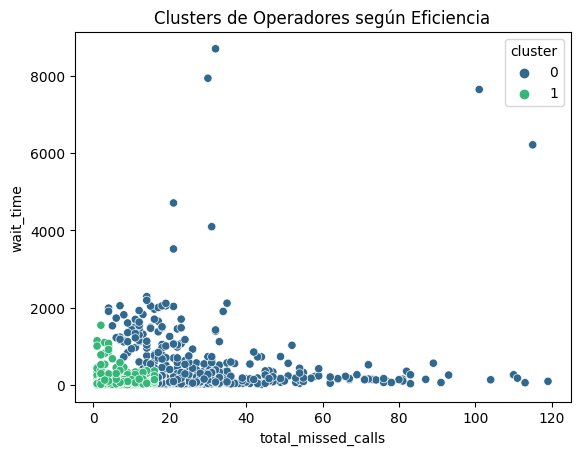

In [ ]:
sns.scatterplot(
    data=final_operators, x='total_missed_calls', y='wait_time', hue='cluster', palette='viridis'
)
plt.title('Clusters de Operadores según Eficiencia')
plt.show()

Interpretando los resultados de las métricas y los clústeres: 
Los clústeres agrupan operadores con características similares; los clúster en la esquina inferior izquierda representan el grupo de  operadores que gestionan las llamadas de manera eficiente. 
Los clústeres que se concentran en la parte superior es el grupo de operadores con mayores problemas, seria el grupo de operadores con un desempeño deficiente. Habría que analizar cuales son  los factores de esos porcentajes de llamadas perdidas y largos tiempo de espera. 

Los elementos del grupo 1 a diferencia del clúster 0 no cuentan con un tiempo de espera alto, y no cuentan con un número alto de llamadas perdidas. 

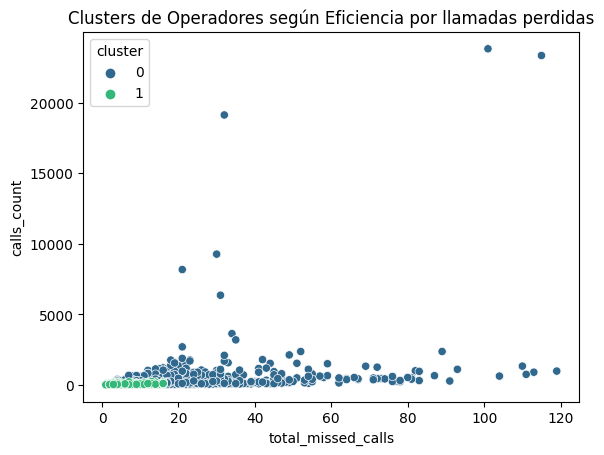

In [ ]:
sns.scatterplot(y=final_operators['calls_count'], x=final_operators['total_missed_calls'], 
                data=final_operators, 
                hue='cluster', 
                palette='viridis'
)
plt.title('Clusters de Operadores según Eficiencia por llamadas perdidas')
plt.show()

Este gráfico muestra una comparación entre el total de llamadas contra el total de llamadas perdidas. 
En este caso los clústeres no muestras mucha similitud, el clúster 0 se muestran visiblemente superior a los clústeres 1. 

## Conclusiones 

Una vez realizado el análisis para poder identificar los operadores ineficaces en el servicio de telefonia CallMeMaybe se concluye lo siguiente: 

Se detectaron ciertos operadores con un desempeño deficiente. Los operadores menos eficaces mostraron una cantidad significativamente mayor de llamadas no atendidas. 

tiempos de espera prolongados, los operadores ineficaces están asociados con una mayor insatisfacción del cliente, debido a tiempos de espera prolongados y menor capacidad de resolución en llamadas entrantes. 

Se realizo una distribución por clústeres para poder segmentar los operadores de acuerdo a su desempeño. Las diferencias observadas entre los operadores eficaces e ineficaces son significativas. 

Recomendaciones

Como analista de datos requerimos contar con mayor información. Por ejemplo, el horario de las llamadas; esto nos permitirá obtener las horas pico donde los usuarios realizan más llamadas y de esta manera obtener métricas que generen más valor para la toma de decisiones. 

Notificaciones proactivas: Implementar un sistema de notificaciones para detectar problemas de eficiencia de forma temprana, que genere un reporte sobre el desempeño de los operadores. 




